<a href="https://colab.research.google.com/github/CoroamaDianaMihaela/C-_VendingMachine/blob/main/fork_of_yolov5_alpr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 for Automatic License Plate Recognition

## Dataset: [Car License Plate Detection](https://www.kaggle.com/andrewmvd/car-plate-detection)
![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F793761%2Fc15e812b3ab9aad2c0694a2e1f7548e9%2FUntitled.png?generation=1590981584876269&alt=media)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Repro [YOLOv5](https://github.com/ultralytics/yolov5)

In [2]:
# Clone YOLOv5 code
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 12078, done.
remote: Total 12078 (delta 0), reused 0 (delta 0), pack-reused 12078
Receiving objects: 100% (12078/12078), 11.87 MiB | 32.15 MiB/s, done.
Resolving deltas: 100% (8380/8380), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 7.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!git clone https://github.com/RobertLucian/license-plate-dataset

Cloning into 'license-plate-dataset'...
remote: Enumerating objects: 1086, done.
remote: Total 1086 (delta 0), reused 0 (delta 0), pack-reused 1086
Receiving objects: 100% (1086/1086), 427.88 MiB | 31.71 MiB/s, done.
Resolving deltas: 100% (534/534), done.
Checking out files: 100% (1070/1070), done.


In [4]:
!echo "train: Dataset/train/images" > data/alpr.yaml
!echo "val:   Dataset/train/images" >> data/alpr.yaml

!echo "nc : 1" >> data/alpr.yaml
!echo "names: ['license']" >> data/alpr.yaml

!cat data/alpr.yaml

train: Dataset/train/images
val:   Dataset/train/images
nc : 1
names: ['license']


## Prepare Dataset

In [5]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [6]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: annotations/Cars0.xml   
  inflating: annotations/Cars1.xml   
  inflating: annotations/Cars10.xml  
  inflating: annotations/Cars100.xml  
  inflating: annotations/Cars101.xml  
  inflating: annotations/Cars102.xml  
  inflating: annotations/Cars103.xml  
  inflating: annotations/Cars104.xml  
  inflating: annotations/Cars105.xml  
  inflating: annotations/Cars106.xml  
  inflating: annotations/Cars107.xml  
  inflating: annotations/Cars108.xml  
  inflating: annotations/Cars109.xml  
  inflating: annotations/Cars11.xml  
  inflating: annotations/Cars110.xml  
  inflating: annotations/Cars111.xml  
  inflating: annotations/Cars112.xml  
  inflating: annotations/Cars113.xml  
  inflating: annotations/Cars114.xml  
  inflating: annotations/Cars115.xml  
  inflating: annotations/Cars116.xml  
  inflating: annotations/Cars117.xml  
  inflating: annotations/Cars118.xml  
  inflating: annotations/Cars119.xml  
  inflating: annotation

In [7]:
%mkdir car_detection
%mv images ./car_detection
%mv annotations ./car_detection

In [8]:
!cp -rf /content/yolov5/car_detection/images/* /content/yolov5/license-plate-dataset/dataset/train/images/

In [9]:
!cp -rf /content/yolov5/car_detection/annotations/* /content/yolov5/license-plate-dataset/dataset/train/annots/

In [10]:
%ls  /content/yolov5/license-plate-dataset/dataset/train/images

 Cars0.png     Cars98.png
 Cars100.png   Cars99.png
 Cars101.png   Cars9.png
 Cars102.png  'dayride_type1_001.mp4#t=1054.jpg'
 Cars103.png  'dayride_type1_001.mp4#t=1056.jpg'
 Cars104.png  'dayride_type1_001.mp4#t=1057.jpg'
 Cars105.png  'dayride_type1_001.mp4#t=1059.jpg'
 Cars106.png  'dayride_type1_001.mp4#t=1060.jpg'
 Cars107.png  'dayride_type1_001.mp4#t=1062.jpg'
 Cars108.png  'dayride_type1_001.mp4#t=1063.jpg'
 Cars109.png  'dayride_type1_001.mp4#t=1071.jpg'
 Cars10.png   'dayride_type1_001.mp4#t=1072.jpg'
 Cars110.png  'dayride_type1_001.mp4#t=1073.jpg'
 Cars111.png  'dayride_type1_001.mp4#t=1075.jpg'
 Cars112.png  'dayride_type1_001.mp4#t=1077.jpg'
 Cars113.png  'dayride_type1_001.mp4#t=1078.jpg'
 Cars114.png  'dayride_type1_001.mp4#t=1082.jpg'
 Cars115.png  'dayride_type1_001.mp4#t=1083.jpg'
 Cars116.png  'dayride_type1_001.mp4#t=1084.jpg'
 Cars117.png  'dayride_type1_001.mp4#t=1086.jpg'
 Cars118.png  'dayride_type1_001.mp4#t=1087.jpg'
 Cars119.png  'dayride_type1_001.mp4#t=10

In [11]:
# copy images
!mkdir -p Dataset/train
!mkdir -p Dataset/train/images
!cp -rf /content/yolov5/license-plate-dataset/dataset/train/images/* Dataset/train/images/

In [12]:
%ls Dataset/train/images

 Cars0.png     Cars98.png
 Cars100.png   Cars99.png
 Cars101.png   Cars9.png
 Cars102.png  'dayride_type1_001.mp4#t=1054.jpg'
 Cars103.png  'dayride_type1_001.mp4#t=1056.jpg'
 Cars104.png  'dayride_type1_001.mp4#t=1057.jpg'
 Cars105.png  'dayride_type1_001.mp4#t=1059.jpg'
 Cars106.png  'dayride_type1_001.mp4#t=1060.jpg'
 Cars107.png  'dayride_type1_001.mp4#t=1062.jpg'
 Cars108.png  'dayride_type1_001.mp4#t=1063.jpg'
 Cars109.png  'dayride_type1_001.mp4#t=1071.jpg'
 Cars10.png   'dayride_type1_001.mp4#t=1072.jpg'
 Cars110.png  'dayride_type1_001.mp4#t=1073.jpg'
 Cars111.png  'dayride_type1_001.mp4#t=1075.jpg'
 Cars112.png  'dayride_type1_001.mp4#t=1077.jpg'
 Cars113.png  'dayride_type1_001.mp4#t=1078.jpg'
 Cars114.png  'dayride_type1_001.mp4#t=1082.jpg'
 Cars115.png  'dayride_type1_001.mp4#t=1083.jpg'
 Cars116.png  'dayride_type1_001.mp4#t=1084.jpg'
 Cars117.png  'dayride_type1_001.mp4#t=1086.jpg'
 Cars118.png  'dayride_type1_001.mp4#t=1087.jpg'
 Cars119.png  'dayride_type1_001.mp4#t=10

In [13]:
!mkdir -p Dataset/val
!mkdir -p Dataset/val/images
!cp -rf /content/yolov5/license-plate-dataset/dataset/valid/images/* Dataset/val/images/

In [14]:
%ls Dataset/val/images

'dayride_type1_001.mp4#t=1055.jpg'  'dayride_type1_001.mp4#t=777.jpg'
'dayride_type1_001.mp4#t=1058.jpg'  'dayride_type1_001.mp4#t=779.jpg'
'dayride_type1_001.mp4#t=1074.jpg'  'dayride_type1_001.mp4#t=784.jpg'
'dayride_type1_001.mp4#t=1085.jpg'  'dayride_type1_001.mp4#t=788.jpg'
'dayride_type1_001.mp4#t=1094.jpg'  'dayride_type1_001.mp4#t=792.jpg'
'dayride_type1_001.mp4#t=1130.jpg'  'dayride_type1_001.mp4#t=793.jpg'
'dayride_type1_001.mp4#t=1135.jpg'  'dayride_type1_001.mp4#t=808.jpg'
'dayride_type1_001.mp4#t=1141.jpg'  'dayride_type1_001.mp4#t=816.jpg'
'dayride_type1_001.mp4#t=1174.jpg'  'dayride_type1_001.mp4#t=824.jpg'
'dayride_type1_001.mp4#t=1182.jpg'  'dayride_type1_001.mp4#t=85.jpg'
'dayride_type1_001.mp4#t=1192.jpg'  'dayride_type1_001.mp4#t=891.jpg'
'dayride_type1_001.mp4#t=1193.jpg'  'dayride_type1_001.mp4#t=903.jpg'
'dayride_type1_001.mp4#t=1198.jpg'  'dayride_type1_001.mp4#t=912.jpg'
'dayride_type1_001.mp4#t=1206.jpg'  'dayride_type1_001.mp4#t=913.jpg'
'dayride_type1_001.mp

In [15]:
!mkdir Dataset/train/labels
!mkdir Dataset/val/labels

### Convert COCO Annotations to YOLOv5 Labels

In [16]:
FILE_ROOT = "/content/yolov5/license-plate-dataset/dataset/train/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annots"

DATA_ROOT = "Dataset/"
DEST_IMAGES_PATH = "train/images"
DEST_LABELS_PATH = "train/labels"

In [17]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    # taking the coordinates of the box
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    # making these parameters so the measurements are between 0 and 1
    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1         # w represents the width of the box
    h = y2 - y1         # h represents the height of the box
    cx = x1 + (w / 2)   # cx represents center x
    cy = y1 + (h / 2)   # cy represents center y
    
    cx = cx * dw
    w = w * dw
    cy = cy * dh 
    h = h * dh 
    
    return [cx, cy, w, h]

In [18]:
 def save_file(img_jpg_file_name, size, img_box):
    """
    This functions has the goal of saving info for the given image in a txt file in the labels folder
    :param size: [w,h] dimensions of the image 
    :param img_jpg_file_name: the file name of the image we are extracting info from
    :param img_box: [cls_name, x1, y1, x2, y2], list of license plates and their coordinates, currently I think its only one
    """
    classes = ['license']
    save_file_name = DATA_ROOT + DEST_LABELS_PATH + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")       # a is for append
    
    for box in img_box:                  
        cls_num = 0
        new_box = cord_converter(size, box[1:])  # convert box coord into YOLO x,y,w,h
        
        # writing the information [cx, cy, w, h] in the .txt file
        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()

In [19]:
import math
def get_xml_data(file_path, img_xml_file, romanian=False):
    """
    :param file_path: the path of dataset with the xml files
    :img_xml_file: the path of the xml file coresponding to the image file
    """
    img_path = file_path + '/' + img_xml_file + '.xml'
    
    # getting the information from the .xml file
    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    # depth represents the number of channels
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    img_box = []
    
    # iterating through each object (licence) found in the image
    for box in objects:
        # cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        cls_name = 'license'
        if romanian==True:
          x1 = int(round(float(box.getElementsByTagName("xmin")[0].childNodes[0].data),3))
          y1 = int(round(float(box.getElementsByTagName("ymin")[0].childNodes[0].data),3))
          x2 = int(round(float(box.getElementsByTagName("xmax")[0].childNodes[0].data),3))
          y2 = int(round(float(box.getElementsByTagName("ymax")[0].childNodes[0].data),3))
        else:
          x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
          y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
          x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
          y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)
    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_file(img_xml_file, [img_w, img_h], img_box)

In [20]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    if len(file_xml)==3:
      get_xml_data(ANNOTATIONS_PATH, file_xml[0]+"."+file_xml[1], romanian=True)
    else:
      get_xml_data(ANNOTATIONS_PATH, file_xml[0])
    

file name:  Cars148.xml
box:(c,xmin,ymin,xmax,ymax) license 135 134 218 158
Dataset/train/labels/Cars148.txt
file name:  Cars417.xml
box:(c,xmin,ymin,xmax,ymax) license 90 145 273 196
Dataset/train/labels/Cars417.txt
file name:  Cars164.xml
box:(c,xmin,ymin,xmax,ymax) license 160 144 239 183
Dataset/train/labels/Cars164.txt
file name:  dayride_type1_001.mp4#t=1056.xml
box:(c,xmin,ymin,xmax,ymax) license 549 485 673 515
Dataset/train/labels/dayride_type1_001.mp4#t=1056.txt
file name:  Cars265.xml
box:(c,xmin,ymin,xmax,ymax) license 87 166 216 212
Dataset/train/labels/Cars265.txt
file name:  dayride_type1_003.mp4#t=324.xml
box:(c,xmin,ymin,xmax,ymax) license 1147 384 1248 412
box:(c,xmin,ymin,xmax,ymax) license 628 527 870 594
Dataset/train/labels/dayride_type1_003.mp4#t=324.txt
file name:  Cars430.xml
box:(c,xmin,ymin,xmax,ymax) license 38 159 116 197
Dataset/train/labels/Cars430.txt
file name:  Cars362.xml
box:(c,xmin,ymin,xmax,ymax) license 139 172 162 179
Dataset/train/labels/Cars362

In [21]:
%ls Dataset/train/labels/ | wc -l

860


In [22]:
FILE_ROOT = "/content/yolov5/license-plate-dataset/dataset/valid/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annots"

DATA_ROOT = "Dataset/"
DEST_IMAGES_PATH = "val/images"
DEST_LABELS_PATH = "val/labels"

In [23]:
!mkdir -p Dataset/val
!mkdir -p Dataset/val/images
!cp -rf /content/yolov5/license-plate-dataset/dataset/valid/images/* Dataset/val/images

In [24]:
!mkdir -p Dataset/val/labels

In [25]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    if len(file_xml)==3:
      get_xml_data(ANNOTATIONS_PATH, file_xml[0]+"."+file_xml[1], romanian=True)
    else:
      get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  nightride_type3_001.mp4#t=52.xml
box:(c,xmin,ymin,xmax,ymax) license 588 286 708 322
Dataset/val/labels/nightride_type3_001.mp4#t=52.txt
file name:  dayride_type1_001.mp4#t=792.xml
box:(c,xmin,ymin,xmax,ymax) license 541 347 623 368
Dataset/val/labels/dayride_type1_001.mp4#t=792.txt
file name:  dayride_type1_001.mp4#t=1206.xml
box:(c,xmin,ymin,xmax,ymax) license 592 406 728 441
box:(c,xmin,ymin,xmax,ymax) license 1153 446 1264 478
Dataset/val/labels/dayride_type1_001.mp4#t=1206.txt
file name:  dayride_type1_001.mp4#t=903.xml
box:(c,xmin,ymin,xmax,ymax) license 638 323 700 341
Dataset/val/labels/dayride_type1_001.mp4#t=903.txt
file name:  dayride_type1_001.mp4#t=1058.xml
box:(c,xmin,ymin,xmax,ymax) license 529 589 711 634
Dataset/val/labels/dayride_type1_001.mp4#t=1058.txt
file name:  nightride_type3_001.mp4#t=715.xml
box:(c,xmin,ymin,xmax,ymax) license 465 451 644 501
box:(c,xmin,ymin,xmax,ymax) license 1120 288 1215 317
Dataset/val/labels/nightride_type3_001.mp4#t=715.txt


In [26]:
!ls Dataset/val/images | wc -l

107


## YOLOv5 Training

In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data data/alpr.yaml --cfg models/yolov5s.yaml

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=data/alpr.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-223-g1dcb774 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0

## YOLOv5 Detect

They are using the benchmark openlpr( alpr: Automatic License Plate Recognition) for testing the model they trained

In [ ]:
# Download OpenALPR Benchmarks
%cd .. 
!git clone https://github.com/openalpr/benchmarks

/kaggle/working
Cloning into 'benchmarks'...
remote: Enumerating objects: 1752, done.
remote: Total 1752 (delta 0), reused 0 (delta 0), pack-reused 1752
Receiving objects: 100% (1752/1752), 187.98 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
%cd yolov5

/kaggle/working/yolov5


In [ ]:
# using on plates from the us
!python detect.py --source ../benchmarks/endtoend/us --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/us', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Fusing layers... 
image 1/222 /kaggle/working/benchmarks/endtoend/us/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg: 384x640 1 licenses, Done. (0.068s)
image 2/222 /kaggle/working/benchmarks/endtoend/us/12c6cb72-3ea3-49e7-b381-e0cdfc5e8960.jpg: 384x640 Done. (0.032s)
image 3/222 /kaggle/working/benchmarks/endtoend/us/1e241dc8-8f18-4955-8988-03a0ab49f813.jpg: 384x640 1 licenses, Done. (0.030s)
image 4/222 /kaggle/working/benchmarks/endtoend/us/21d8c31d-3deb-494b-9c63-c0223306fd82.jpg: 384x640 1 licenses, Done. (0.030s)
image 5/222 /kaggle/working/benchmarks/endtoend/us/22e54a62-57a8-4a0a-88c1-4b9758f67651.jpg: 384x640 1 licenses, Done. (0.031s)
image 6/222 /kaggle/working/benchmarks/endtoe

In [ ]:
# from the european union
!python detect.py --source ../benchmarks/endtoend/eu --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/eu', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Fusing layers... 
image 1/108 /kaggle/working/benchmarks/endtoend/eu/eu1.jpg: 480x640 3 licenses, Done. (0.041s)
image 2/108 /kaggle/working/benchmarks/endtoend/eu/eu10.jpg: 544x640 2 licenses, Done. (0.039s)
image 3/108 /kaggle/working/benchmarks/endtoend/eu/eu11.jpg: 416x640 1 licenses, Done. (0.041s)
image 4/108 /kaggle/working/benchmarks/endtoend/eu/eu2.jpg: 480x640 1 licenses, Done. (0.031s)
image 5/108 /kaggle/working/benchmarks/endtoend/eu/eu3.jpg: 480x640 1 licenses, Done. (0.030s)
image 6/108 /kaggle/working/benchmarks/endtoend/eu/eu4.jpg: 416x640 Done. (0.030s)
image 7/108 /kaggle/working/benchmarks/endtoend/eu/eu5.jpg: 416x640 1 licenses, Done. (0.029s)
image 8/108 /kaggl

In [ ]:
# from brazil
!python detect.py --source ../benchmarks/endtoend/br --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/br', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Fusing layers... 
image 1/115 /kaggle/working/benchmarks/endtoend/br/AYO9034.jpg: 384x640 1 licenses, Done. (0.039s)
image 2/115 /kaggle/working/benchmarks/endtoend/br/AZJ6991.jpg: 640x640 1 licenses, Done. (0.029s)
image 3/115 /kaggle/working/benchmarks/endtoend/br/FZB9581.jpg: 640x640 1 licenses, Done. (0.030s)
image 4/115 /kaggle/working/benchmarks/endtoend/br/GWT2180.jpg: 384x640 1 licenses, Done. (0.031s)
image 5/115 /kaggle/working/benchmarks/endtoend/br/HPM9362.jpg: 480x640 1 licenses, Done. (0.039s)
image 6/115 /kaggle/working/benchmarks/endtoend/br/JGZ3298.jpg: 480x640 1 licenses, Done. (0.031s)
image 7/115 /kaggle/working/benchmarks/endtoend/br/JIT7463.jpg: 640x384 1 licen

### Display Detected Images

In [ ]:
from IPython.display import Image

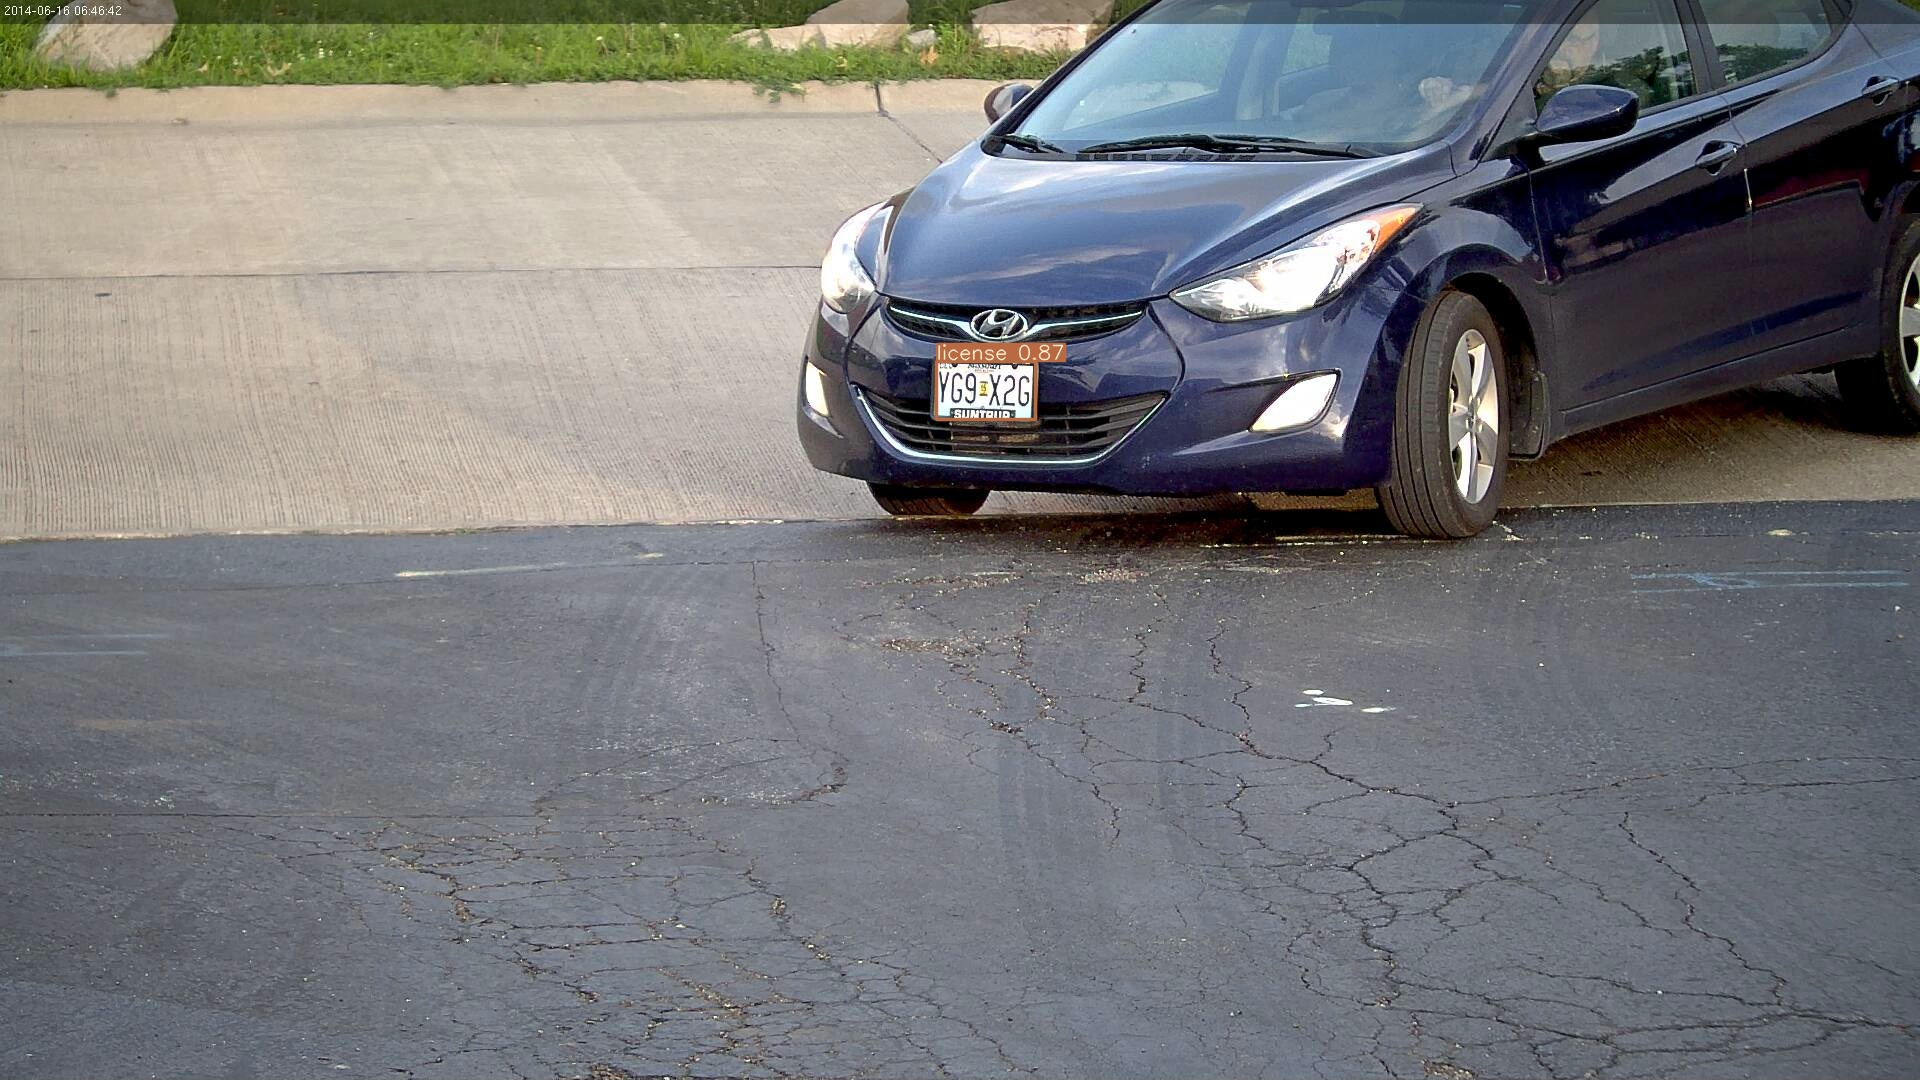

In [ ]:
Image('runs/detect/exp/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg')

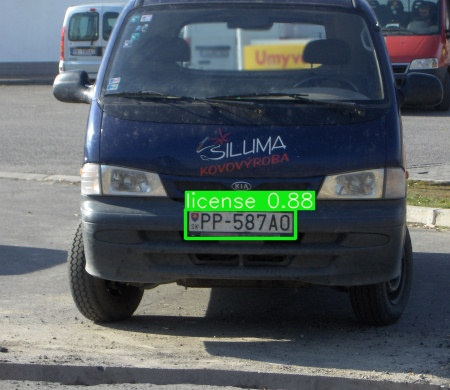

In [ ]:
Image('runs/detect/exp2/test_001.jpg')

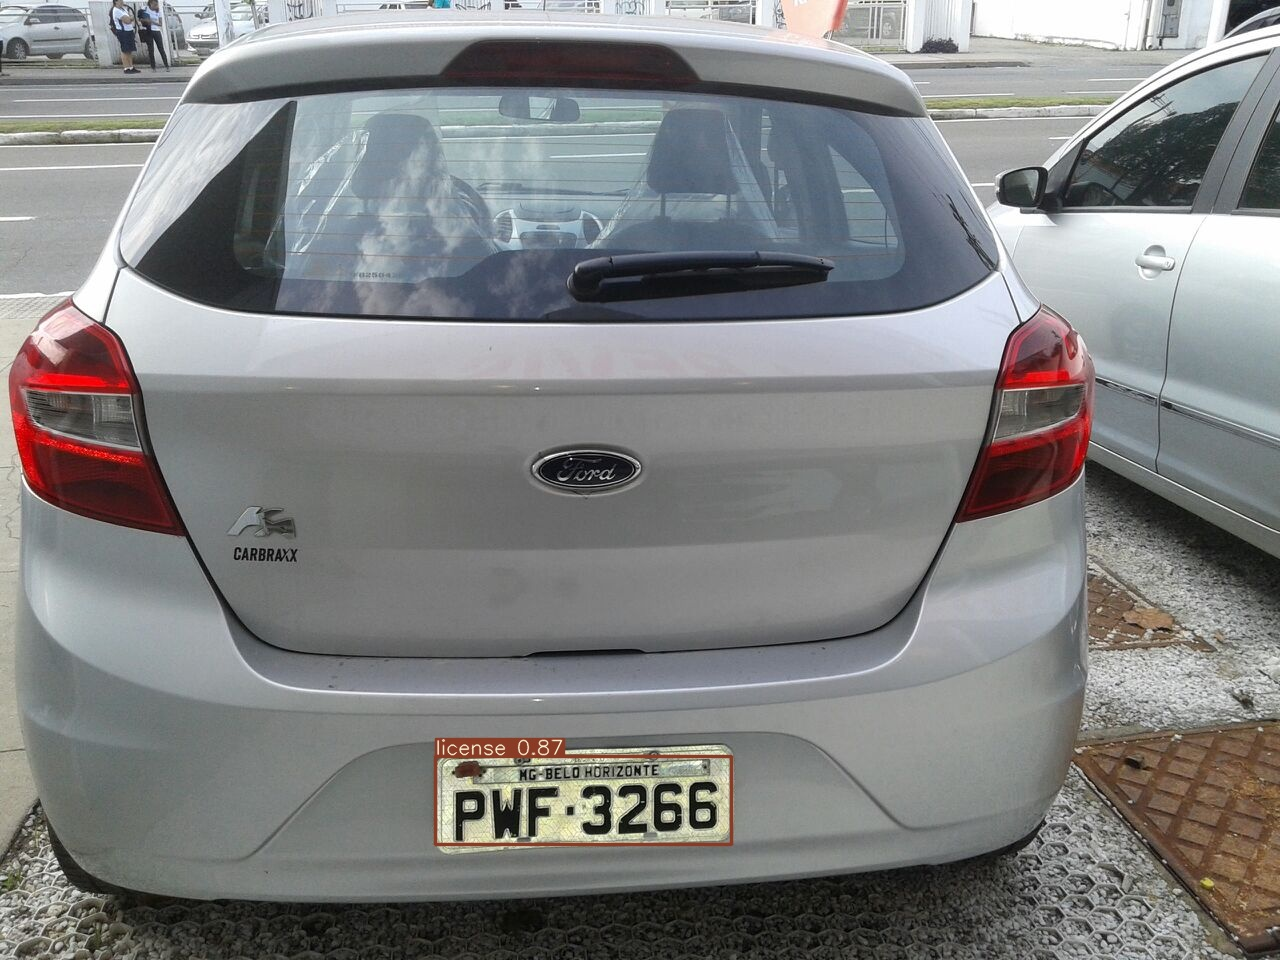

In [ ]:
Image('runs/detect/exp3/PWF3266.jpg')

## OCR 
### get detected ALPR bounding box

In [ ]:
# list saved .txt
!ls runs/detect/exp/labels

0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.txt  wts-lg-000032.txt  wts-lg-000120.txt
1e241dc8-8f18-4955-8988-03a0ab49f813.txt  wts-lg-000033.txt  wts-lg-000121.txt
21d8c31d-3deb-494b-9c63-c0223306fd82.txt  wts-lg-000034.txt  wts-lg-000122.txt
22e54a62-57a8-4a0a-88c1-4b9758f67651.txt  wts-lg-000035.txt  wts-lg-000123.txt
316b64c0-55bf-4079-a1c0-d93f461a576f.txt  wts-lg-000036.txt  wts-lg-000124.txt
33fa5185-0286-4e8f-b775-46162eba39d4.txt  wts-lg-000037.txt  wts-lg-000125.txt
37170dd1-2802-4e38-b982-c5d07c64ff67.txt  wts-lg-000038.txt  wts-lg-000126.txt
3850ba91-3c64-4c64-acba-0c46b61ec0da.txt  wts-lg-000039.txt  wts-lg-000127.txt
4be2025c-09f7-4bb0-b1bd-8e8633e6dec1.txt  wts-lg-000040.txt  wts-lg-000128.txt
5b562a61-34ad-4f00-9164-d34abb7a38e4.txt  wts-lg-000041.txt  wts-lg-000129.txt
7fbfbe28-aecb-45be-bd05-7cf26acb3c5c.txt  wts-lg-000042.txt  wts-lg-000130.txt
c9368c55-210d-456c-a5ef-c310e60039ec.txt  wts-lg-000043.txt  wts-lg-000131.txt
car1.txt				  wts-lg-000044.txt  wts-lg-000132.txt
c

In [ ]:
# read .txt to get x,y,w,h of ALPR
def read_txt(filepath):
    f = open(filepath, 'r')
    lines = f.readlines()
         
    # read objects from each line of .txt
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [int(float(i)) for i in line.split(' ')]
        objects.append(obj)
    #print(objects)
    return objects

### OCR using PyTesseract

In [ ]:
!pip install pytesseract

In [ ]:
DETECT_PATH = '/kaggle/working/yolov5/runs/detect/exp/'
IMG_NAME    = 'us10'

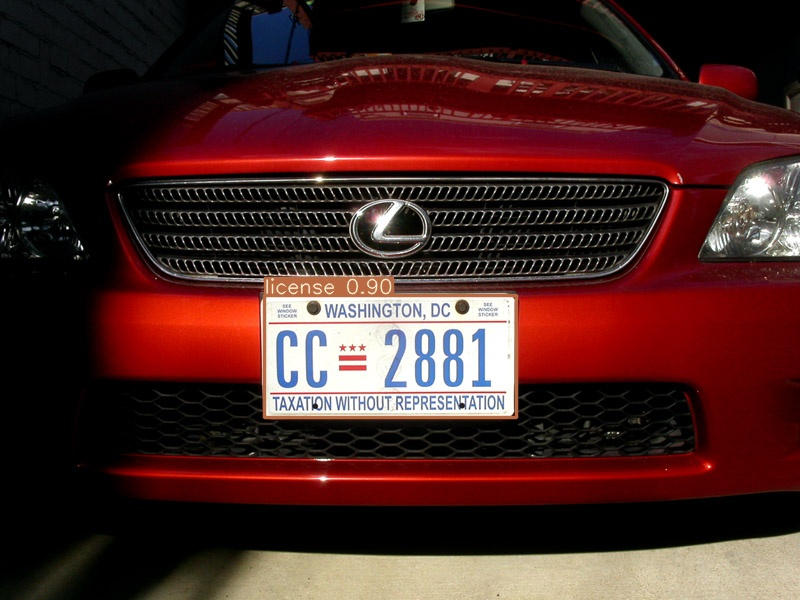

In [ ]:
Image(DETECT_PATH+IMG_NAME+'.jpg')

390 356 252 122
@ WASHINGTON, DC @

CC= 2881

TAXATION WITHOUT. REPRESENWATION

 



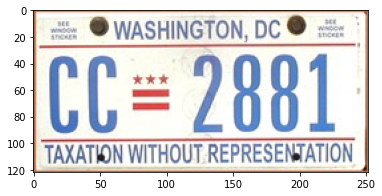

In [ ]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(DETECT_PATH+IMG_NAME+'.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lics = read_txt(DETECT_PATH +'labels/'+IMG_NAME+'.txt')

for lic in lics:
    c, x, y, w, h = lic
    print(x,y,w,h) # center of the bounding box
    img_alpr = img[y-int(h/2):y+int(h/2),x-int(w/2):x+int(w/2)]
    plt.imshow(img_alpr)
    txt = pytesseract.image_to_string(img_alpr)
    print(txt)
    
#    img = cv2.putText(img, txt, (x-int(w/2),y-int(h/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)   
#cv2.imwrite('alpr_us1.jpg', img)

## Saving the weights

In [ ]:
!cd ..
!cp runs/train/exp/weights/best.pt /kaggle/working/